<a href="https://colab.research.google.com/github/sauravsingla/General/blob/master/Job_Post_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given a dataset of job descriptions want to classify the sentences extracted from the text into the following classes:
- BENEFITS
- REQUIREMENTS
- RESPONSABILITIES
- OTHER



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# installing pandas
!pip3 install pandas==0.24.1

In [ ]:
# importing library
import joblib
import pandas as pd
import numpy as np

In [ ]:
# loading Dictionary
sourceDictionary = joblib.load('/content/drive/My Drive/dataset')

In [ ]:
# class of the dataset
print(type(sourceDictionary))

<class 'dict'>


In [ ]:
# length of the dictionary 
len(sourceDictionary.items())

4200

In [ ]:
# naming data frame columns
resultDF = pd.DataFrame(columns = {'job_id', 'job_description', 'target_label'})

In [ ]:
# coverting into data frame
for adId in sourceDictionary:
  for taggedText in sourceDictionary[adId]:
        resultDF = resultDF.append({resultDF.columns[0]: adId, resultDF.columns[1]: taggedText[0], resultDF.columns[2]: taggedText[1]}, ignore_index=True)

In [ ]:
# naming data frame columns
resultDF.columns = ['job_id', 'job_description','target_label']

In [ ]:
# top 5 rows of the dataset
resultDF.head(5)

,job_id,job_description,target_label
0,14233229,linsco recruitment are currently working on be...,OTHER
1,14233229,the client has a current requirement for a tel...,REQUIREMENTS
2,14233229,the right candidate will be required to build ...,RESPONSABILITIES
3,14233229,emphasis is very much on the provision of qual...,OTHER
4,14233229,for this role you must have superb communicati...,RESPONSABILITIES


In [ ]:
# training dataset into the CSV file
resultDF.to_csv('dataset.csv', sep=",", float_format='%.2f',index=False, line_terminator='\n',encoding='utf-8')

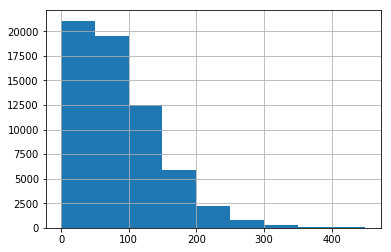

In [ ]:
# distribution of the text data
lens = resultDF.job_description.str.len()
lens.hist(bins = np.arange(0,500,50))

In [ ]:
# number of oberservations in the dataset
len(resultDF)

62627

In [ ]:
# checking the class
print(type(resultDF))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# checking any missing values
resultDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62627 entries, 0 to 62626
Data columns (total 3 columns):
job_id             62627 non-null object
job_description    62627 non-null object
target_label       62627 non-null object
dtypes: object(3)
memory usage: 1.4+ MB


In [ ]:
# dimension of the dataset
resultDF.shape

(62627, 3)

In [ ]:
from io import StringIO
col = ['job_description', 'target_label']
resultDF = resultDF[col]
resultDF = resultDF[pd.notnull(resultDF['job_description'])]
resultDF.columns = ['job_description', 'target_label']
resultDF['target_id'] = resultDF['target_label'].factorize()[0]
category_id_df = resultDF[['target_label', 'target_id']].drop_duplicates().sort_values('target_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['target_id', 'target_label']].values)

resultDF.head()

,job_description,target_label,target_id
0,linsco recruitment are currently working on be...,OTHER,0
1,the client has a current requirement for a tel...,REQUIREMENTS,1
2,the right candidate will be required to build ...,RESPONSABILITIES,2
3,emphasis is very much on the provision of qual...,OTHER,0
4,for this role you must have superb communicati...,RESPONSABILITIES,2


In [ ]:
# counting number of classes in the target label
resultDF['target_label'].value_counts()

OTHER               29757
REQUIREMENTS        17248
RESPONSABILITIES    12484
BENEFITS             3138
Name: target_label, dtype: int64

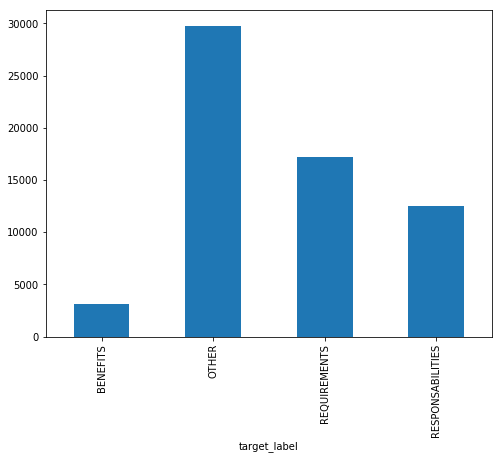

In [ ]:
# benefit is the minority class in the dataset
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
resultDF.groupby('target_label').job_description.count().plot.bar(ylim=0)

plt.show()

In [ ]:
# checking the value
resultDF['job_description'][2]

'the right candidate will be required to build relationships with prospects by telephone with the aim of securing an appointment for the client'

In [ ]:
# text normalisation function
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
# normalising job description column
resultDF['job_description'] = resultDF['job_description'].map(lambda com : clean_text(com))
resultDF['job_description'][2]

'the right candidate will be required to build relationships with prospects by telephone with the aim of securing an appointment for the client'

In [ ]:
# reading Pickle/Pandas DataFrame
testset=joblib.load('/content/drive/My Drive/testset')

In [ ]:
# checking the class
print(type(testset))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# no of oberservations in the test dataset
len(testset)

1800

In [ ]:
# dimension of the test dataset
testset.shape

(1800, 2)

In [ ]:
# top 5 rows of the test dataset
testset.head(5)

,job_id,job_description
1782,26817970,<p>Our client is looking for a Mechanical Tec...
3917,9402535,Do you enjoy being a Legal Secretary and want ...
221,7760647,A welcoming school on the Greenwich peninsula ...
2135,5776807,Analyse requirements code and test Windows CE...
5224,25474847,<p>We are currently recruiting for 7.5t (C1) ...


In [ ]:
# Taking subset of the sample from the training data
resultDF = resultDF.sample(frac=0.3, replace=True, random_state=1)

In [ ]:
# length of the training data
len(resultDF)

18788

In [ ]:
# Bag-of-words
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(resultDF.job_description).toarray()
labels = resultDF.target_id

features.shape

(18788, 6921)

In [ ]:
# Use 'sklearn.feature_selection.chi2' to find the terms that are the most correlated with each of the job description
from sklearn.feature_selection import chi2
import numpy as np

N = 2

for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("--> '{}':".format(Product))
  print("  . Most Correlated Unigrams are :\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most Correlated Bigrams are :\n. {}".format('\n. '.join(bigrams[-N:])))

--> 'BENEFITS':
  . Most Correlated Unigrams are :
. scheme
. pension
  . Most Correlated Bigrams are :
. competitive salary
. days holiday
--> 'OTHER':
  . Most Correlated Unigrams are :
. ability
. apply
  . Most Correlated Bigrams are :
. experience working
. communication skills
--> 'REQUIREMENTS':
  . Most Correlated Unigrams are :
. ability
. experience
  . Most Correlated Bigrams are :
. communication skills
. experience working
--> 'RESPONSABILITIES':
  . Most Correlated Unigrams are :
. ensuring
. ensure
  . Most Correlated Bigrams are :
. assessed merit
. individual assessed


In [ ]:
# splitting training dataset for validation purpose
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(resultDF['job_description'], resultDF['target_label'], random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed

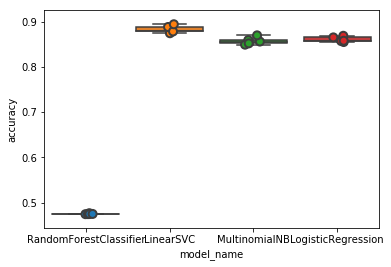

In [ ]:
# different models applied
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import seaborn as sns

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

plt.show()

In [ ]:
# accuracy of different model
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.882534
LogisticRegression        0.860550
MultinomialNB             0.856985
RandomForestClassifier    0.474931
Name: accuracy, dtype: float64

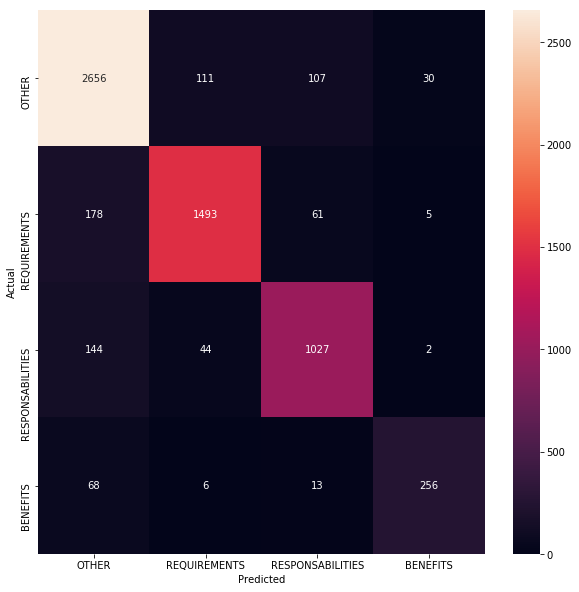

In [ ]:
# confusion matrix
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, resultDF.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.target_label.values, yticklabels=category_id_df.target_label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# predicted result
from IPython.display import display
for predicted in category_id_df.target_id:
  for actual in category_id_df.target_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(resultDF.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['target_label', 'job_description']])
      print('')

'REQUIREMENTS' predicted as 'OTHER' : 178 examples.


,target_label,job_description
43294,REQUIREMENTS,an interest in the ongoing development of lega...
52348,REQUIREMENTS,high customer focus
21311,REQUIREMENTS,evidence of coaching skills
9122,REQUIREMENTS,current 7 5t experience
62581,REQUIREMENTS,must come from a warehouse background have exp...
25730,REQUIREMENTS,customer focus
29414,REQUIREMENTS,technical expertise in eias to support existin...
29414,REQUIREMENTS,technical expertise in eias to support existin...
56896,REQUIREMENTS,jenkins automated build pipelines
27364,REQUIREMENTS,you must be committed to safeguarding and prom...



'RESPONSABILITIES' predicted as 'OTHER' : 144 examples.


,target_label,job_description
17875,RESPONSABILITIES,project is to provide a disaster recovery set ...
41957,RESPONSABILITIES,guides and motivates others to provide excelle...
17878,RESPONSABILITIES,develop business continuity plan disaster reco...
8017,RESPONSABILITIES,the service delivery manager ensures that the ...
45228,RESPONSABILITIES,structuring trusts
19531,RESPONSABILITIES,you will join our clients quantitative researc...
35506,RESPONSABILITIES,this role will involve cold calling
45932,RESPONSABILITIES,provide a professional service to all accounts...
42350,RESPONSABILITIES,whilst most designs will be focussed on emails...
29036,RESPONSABILITIES,submission of overflight landing and diplomati...



'BENEFITS' predicted as 'OTHER' : 68 examples.


,target_label,job_description
15947,BENEFITS,with modern facilities and excellent results t...
19266,BENEFITS,cpd will be provided by the school and local a...
25514,BENEFITS,stay in touch with us to hear more about our o...
1563,BENEFITS,an established training provider
3295,BENEFITS,salary will be â 30 â 35k basic with â 60 â 90...
36900,BENEFITS,a generous salary and benefits package is on o...
27714,BENEFITS,all breaks are paid
18279,BENEFITS,weekend premiums
16355,BENEFITS,ismm accredited sales and marketing training
16355,BENEFITS,ismm accredited sales and marketing training



'OTHER' predicted as 'REQUIREMENTS' : 111 examples.


,target_label,job_description
2424,OTHER,you will be working out of the distribution ce...
47940,OTHER,you will be expected to pass our clients asses...
43269,OTHER,qualifications knowledge and experience
49168,OTHER,will be contracted to work 8 hours but should ...
27614,OTHER,i am regularly requested back into schools and...
42759,OTHER,a fit able to lift 20kls boxes person is neede...
13237,OTHER,recruitment is a highly targeted sales environ...
13237,OTHER,recruitment is a highly targeted sales environ...
1979,OTHER,the company prides itself on its authoritative...
10151,OTHER,your current availability and notice period if...



'RESPONSABILITIES' predicted as 'REQUIREMENTS' : 44 examples.


,target_label,job_description
30252,RESPONSABILITIES,management of cloud and traditional infrastruc...
34772,RESPONSABILITIES,the role will be focused around the provision ...
25031,RESPONSABILITIES,work as part of a team within a fast paced dyn...
19370,RESPONSABILITIES,applying a practical and commercially effectiv...
20585,RESPONSABILITIES,understanding the cost impact of engineering c...
16737,RESPONSABILITIES,investigation of ports of call
42681,RESPONSABILITIES,using your skills to maximise the sales opport...
45438,RESPONSABILITIES,operating and cleaning high powered pumps and ...
45438,RESPONSABILITIES,operating and cleaning high powered pumps and ...
6657,RESPONSABILITIES,share newly developed techniques document temp...



'OTHER' predicted as 'RESPONSABILITIES' : 107 examples.


,target_label,job_description
11306,OTHER,based in london some travel will be required p...
19843,OTHER,we provide honest feedback and manage the recr...
10347,OTHER,with the support and guidance of the design ma...
10347,OTHER,with the support and guidance of the design ma...
48597,OTHER,there agents sign up more new customers every ...
12184,OTHER,the technical lead will become a technical foc...
39214,OTHER,the adopted attitude is that no idea is a bad ...
39990,OTHER,you will be managing the following
42862,OTHER,they are also integrally involved in the prese...
42862,OTHER,they are also integrally involved in the prese...



'REQUIREMENTS' predicted as 'RESPONSABILITIES' : 61 examples.


,target_label,job_description
57903,REQUIREMENTS,the role demands a highly numerate individual ...
29933,REQUIREMENTS,results oriented strives for team individual g...
49775,REQUIREMENTS,complex lan wan firewall deployments
55946,REQUIREMENTS,confident working alone mechanically i e help ...
55946,REQUIREMENTS,confident working alone mechanically i e help ...
58652,REQUIREMENTS,territory knowledge of key buyers promotional ...
46723,REQUIREMENTS,project leadership
46723,REQUIREMENTS,project leadership
55946,REQUIREMENTS,confident working alone mechanically i e help ...
55946,REQUIREMENTS,confident working alone mechanically i e help ...



'BENEFITS' predicted as 'RESPONSABILITIES' : 13 examples.


,target_label,job_description
37502,BENEFITS,it s a totally free employability course with ...
16035,BENEFITS,you will be fully supported with a very compre...
16035,BENEFITS,you will be fully supported with a very compre...
33440,BENEFITS,thriving social engagement including 2 employe...
56686,BENEFITS,regular social evenings
56686,BENEFITS,regular social evenings
39539,BENEFITS,regular networking and social events
50675,BENEFITS,they also run monthly book club lunches and di...
41825,BENEFITS,mobile smart phones tablets
44018,BENEFITS,company corporate law company law issues compa...



'OTHER' predicted as 'BENEFITS' : 30 examples.


,target_label,job_description
31463,OTHER,aircraft de icer 8 50 to 9 50 bonus payable fo...
11608,OTHER,they are looking for their next batch of train...
57010,OTHER,the school is in the midst of excellent public...
486,OTHER,sunday overtime 17 48ph
486,OTHER,sunday overtime 17 48ph
486,OTHER,sunday overtime 17 48ph
486,OTHER,sunday overtime 17 48ph
15869,OTHER,benefits package
30573,OTHER,your evenings and weekends can be free and you...
34353,OTHER,training


In [ ]:
# correlated words
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'BENEFITS':
  . Top unigrams:
       . scheme
       . free
  . Top bigrams:
       . 000 benefits
       . competitive salary
# 'OTHER':
  . Top unigrams:
       . opportunity
       . join
  . Top bigrams:
       . working targets
       . warehouse distribution
# 'REQUIREMENTS':
  . Top unigrams:
       . ability
       . able
  . Top bigrams:
       . experience working
       . experience managing
# 'RESPONSABILITIES':
  . Top unigrams:
       . ensure
       . ensuring
  . Top bigrams:
       . professional manner
       . work team


In [ ]:
# final results of the classes of the target variable
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=resultDF['target_label'].unique()))

                  precision    recall  f1-score   support

           OTHER       0.87      0.91      0.89      2904
    REQUIREMENTS       0.90      0.86      0.88      1737
RESPONSABILITIES       0.85      0.84      0.85      1217
        BENEFITS       0.87      0.75      0.81       343

       micro avg       0.88      0.88      0.88      6201
       macro avg       0.87      0.84      0.86      6201
    weighted avg       0.88      0.88      0.88      6201



In [ ]:
# text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer,
# which builds a dictionary of features and transforms documents to feature vectors
# text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer
# dictionary of features and transforms documents to feature vectors
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(resultDF.job_description)
X_train_counts.shape

(18788, 10455)

In [ ]:
# converting vector to TFIDF
# downscale weights for words through TFIDF
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(18788, 10455)

***Classifier used Naive bayes***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, resultDF.target_label)

In [ ]:
from sklearn.pipeline import Pipeline

# building a pipeline 
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])

# fit the training dataset on the classifier
text_clf = text_clf.fit(resultDF.job_description, resultDF.target_label)

# predict the labels on testing dataset
predicted = text_clf.predict(testset.job_description)

In [ ]:
# predicted labels on testing dataset and its CSV file
testset['predicted']=predicted
testset.to_csv('NB_test_data.csv')

***Classifier used SVM***

In [ ]:
from sklearn.linear_model import SGDClassifier

# building a pipeline 
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)),])

# fit the training dataset on the classifier
text_clf_svm= text_clf_svm.fit(resultDF.job_description, resultDF.target_label)

# predict the labels on testing dataset
predicted_svm = text_clf_svm.predict(testset.job_description)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [ ]:
from sklearn.linear_model import SGDClassifier

# building a pipeline 
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)),])

# fit the training dataset on the classifier
text_clf_svm= text_clf_svm.fit(resultDF.job_description, resultDF.target_label)

# predict the labels on testing dataset
predicted_svm = text_clf_svm.predict(testset.job_description)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [ ]:
from nltk.stem.snowball import SnowballStemmer

# stemmer is the process of reducing inflected words to their word stem
stemmer = SnowballStemmer("english", ignore_stopwords=True)

# stemmer
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')

# building pipeline
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), ('tfidf', TfidfTransformer()), ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)), ])

# fit the training dataset on the classifier
text_mnb_stemmed = text_mnb_stemmed.fit(resultDF.job_description, resultDF.target_label)

# predict the labels on testing dataset
predicted_mnb_stemmed = text_mnb_stemmed.predict(testset.job_description)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [ ]:
# predicted labels on testing dataset and its CSV file
testset['predicted_svm']=predicted_svm
testset.to_csv('SVM_test_data.csv')

***Using Glove embedding with CNN for text classification***

In [ ]:
# installing deep learning library
!pip3 install deeppavlov

  Using cached https://files.pythonhosted.org/packages/ab/92/33166dcd4fd87b171d5d37a87e19fc936e97f0a7ddbe2e7c0cdae7ceabb6/deeppavlov-0.2.0-py3-none-any.whl
    100% |████████████████████████████████| 3.4MB 12.8MB/s 
    100% |████████████████████████████████| 92kB 34.5MB/s 
  Using cached https://files.pythonhosted.org/packages/57/eb/6ab533ea8e35e7dd159af6922ac1123d4565d89f3926ad9a6aa46530978f/pandas-0.23.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 31.2MB 1.5MB/s 
    100% |████████████████████████████████| 4.1MB 11.0MB/s 
    100% |████████████████████████████████| 307kB 29.8MB/s 
  Using cached https://files.pythonhosted.org/packages/3d/2d/9fbc7baa5f44bc9e88ffb7ed32721b879bfa416573e85031e16f52569bc9/scikit_learn-0.19.1-cp36-cp36m-manylinux1_x86_64.whl
    100% |████████████████████████████████| 12.2MB 4.9MB/s 
  Using cached https://files.pythonhosted.org/packages/a4/5a/7aab147b253f19e5ef007316f39cf693a63d5cd7f654c3805c76f6bde979/pyTelegramBotAPI-3.

In [ ]:
# importing the file
from deeppavlov.dataset_readers.basic_classification_reader import BasicClassificationDatasetReader

In [ ]:
# reading the test dataset 
dr = BasicClassificationDatasetReader().read(
    data_path='/content/',
    train='dataset.csv',
    x = 'job_description',
    y = 'target_label'
)

2019-04-22 13:08:03.230 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 95: Cannot find /content/valid.csv file
2019-04-22 13:08:03.231 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 95: Cannot find /content/test.csv file


In [ ]:
# checking train/valid/test sizes
[(k, len(dr[k])) for k in dr.keys()]

[('train', 62627), ('valid', 0), ('test', 0)]

***Use BasicClassificationDatasetIterator to split train on train and valid and to generate batches of samples***

In [ ]:
# importing library
from deeppavlov.dataset_iterators.basic_classification_iterator import BasicClassificationDatasetIterator

In [ ]:
# data iterator splitting train  and valid in proportion 0.8/0.2
train_iterator = BasicClassificationDatasetIterator(
    data=dr,
    field_to_split='train',  # field that will be splitted
    split_fields=['train', 'valid'],   # fields to which the field above will be splitted
    split_proportions=[0.8, 0.2],  #proportions for splitting
    split_seed=23,  # seed for splitting dataset
    seed=42)  # seed for iteration over dataset

2019-04-22 13:08:03.266 INFO in 'deeppavlov.dataset_iterators.basic_classification_iterator'['basic_classification_iterator'] at line 73: Splitting field <<train>> to new fields <<['train', 'valid']>>


In [ ]:
# checking train instances 
x_train, y_train = train_iterator.get_instances(data_type='train')
for x, y in list(zip(x_train, y_train))[:5]:
    print('x:', x)
    print('y:', y)
    print('=================')

x: our mission is to build long-term relationships and help clients and candidates find the perfect match
y: ['OTHER']
x: previous work in a manufacturing assembly environment using a variety of hand tools
y: ['REQUIREMENTS']
x: the firm welcome applications with strong organisational skills who are able to demonstrate their ability to manage and prioritise large workloads
y: ['REQUIREMENTS']
x: you must have experience in working with 0-5 years hold a childcare qualification and a current crb
y: ['REQUIREMENTS']
x: regard recruitment is an employment agency and is committed to equal opportunities
y: ['OTHER']


In [ ]:
# importing library
from deeppavlov.models.preprocessors.str_lower import StrLower

In [ ]:
# lowercase the text
str_lower = StrLower()

In [ ]:
# importing the library
# NLTKTokenizer can split string to tokens
from deeppavlov.models.tokenizers.nltk_moses_tokenizer import NLTKMosesTokenizer

In [ ]:
# generating token
tokenizer = NLTKMosesTokenizer()

In [ ]:
# generating token on the training dataset-independent variable
# Let's preprocess all train part of the dataset
train_x_lower_tokenized = str_lower(tokenizer(train_iterator.get_instances(data_type='train')[0]))

**extracting class labels and converting labels to indices and building of characters or tokens vocabularies **



In [ ]:
# importing library
from deeppavlov.core.data.simple_vocab import SimpleVocabulary

In [ ]:
# initialize vocabulary to collect all appeared in the dataset classes
classes_vocab = SimpleVocabulary(
    save_path='./snips/classes.dict',
    load_path='./snips/classes.dict')

2019-04-22 13:08:09.50 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 103: [loading vocabulary from /content/snips/classes.dict]


In [ ]:
# saving instances of the dataset classes
classes_vocab.fit((train_iterator.get_instances(data_type='train')[1]))
classes_vocab.save()

2019-04-22 13:08:09.434 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 89: [saving vocabulary to /content/snips/classes.dict]


In [ ]:
# there are 4 classes of the target variable
list(classes_vocab.items())

[('OTHER', 0), ('REQUIREMENTS', 1), ('RESPONSABILITIES', 2), ('BENEFITS', 3)]

In [ ]:
# vocabulary of textual tokens appeared 2 and more times in the dataset
token_vocab = SimpleVocabulary(
    save_path='./snips/tokens.dict',
    load_path='./snips/tokens.dict',
    min_freq=2,
    special_tokens=('<PAD>', '<UNK>',),
    unk_token='<UNK>')

2019-04-22 13:08:09.455 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 103: [loading vocabulary from /content/snips/tokens.dict]


In [ ]:
# saving the vocabulary
token_vocab.fit(train_x_lower_tokenized)
token_vocab.save()

2019-04-22 13:08:10.950 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 89: [saving vocabulary to /content/snips/tokens.dict]


In [ ]:
# number of tokens in dictionary
len(token_vocab)

10807

In [ ]:
# 10 most common words and number of times their appeared
token_vocab.freqs.most_common()[:10]

[('and', 30246),
 ('to', 23538),
 ('the', 22467),
 ('a', 18228),
 ('of', 16416),
 ('in', 11932),
 ('for', 9641),
 ('with', 8710),
 ('you', 8475),
 ('will', 7746)]

In [ ]:
# token id on the example sentence
token_ids = token_vocab(str_lower(tokenizer(['how are you'])))
token_ids

[[792, 15, 10]]

In [ ]:
# generating the original text
tokenizer(token_vocab(token_ids))

['how are you']

***Bag-of-words (BoW) and TF-IDF vectorizers converts text samples to vectors (one vector per sample) while fastText, GloVe, fastText weighted by TF-IDF embedders either produce an embedding vector per token or an embedding vector per text sample (if mean set to True)***

In [ ]:
# import library
import numpy as np
from deeppavlov.models.embedders.bow_embedder import BoWEmbedder

In [ ]:
# initialize bag-of-words embedder giving total number of tokens
bow = BoWEmbedder(depth=token_vocab.len)

# indexed tokenized samples
bow(token_vocab(str_lower(tokenizer(['how are you']))))

[array([0, 0, 0, ..., 0, 0, 0], dtype=int32)]

In [ ]:
# all 3 tokens are in the vocabulary
sum(bow(token_vocab(str_lower(tokenizer(['how are you']))))[0])

3

In [ ]:
# import library
from deeppavlov.models.sklearn import SklearnComponent

In [ ]:
# initialize TF-IDF vectorizer sklearn component with `transform` as infer method
tfidf = SklearnComponent(
    model_class="sklearn.feature_extraction.text:TfidfVectorizer",
    infer_method="transform",
    save_path='./tfidf_v0.pkl',
    load_path='./tfidf_v0.pkl',
    mode='train')

2019-04-22 13:08:11.57 WARNING in 'deeppavlov.models.sklearn.sklearn_component'['sklearn_component'] at line 218: Cannot load model from /content/tfidf_v0.pkl
2019-04-22 13:08:11.59 INFO in 'deeppavlov.models.sklearn.sklearn_component'['sklearn_component'] at line 165: Initializing model sklearn.feature_extraction.text:TfidfVectorizer from scratch


In [ ]:
# fit on textual train instances and save it
tfidf.fit(str_lower(train_iterator.get_instances(data_type='train')[0]))
tfidf.save()

2019-04-22 13:08:12.315 INFO in 'deeppavlov.models.sklearn.sklearn_component'['sklearn_component'] at line 108: Fitting model sklearn.feature_extraction.text:TfidfVectorizer
2019-04-22 13:08:13.505 INFO in 'deeppavlov.models.sklearn.sklearn_component'['sklearn_component'] at line 240: Saving model to /content/tfidf_v0.pkl


In [ ]:
# number of tokens in the TF-IDF vocabulary
len(tfidf.model.vocabulary_)

16733

***Glove Embedder nsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space***

In [ ]:
# import gloveembedder
from deeppavlov.models.embedders.glove_embedder import GloVeEmbedder

In [ ]:
# import library
from deeppavlov.core.data.utils import simple_download

In [ ]:
# downloading pretrained embedding Glove
simple_download(url="http://files.deeppavlov.ai/embeddings/glove.6B.100d.txt",destination="./glove.6B.100d.txt")

2019-04-22 13:08:13.884 INFO in 'deeppavlov.core.data.utils'['utils'] at line 63: Downloading from http://files.deeppavlov.ai/embeddings/glove.6B.100d.txt to glove.6B.100d.txt
347MB [00:27, 12.5MB/s]


In [ ]:
# loading glove embedder
embedder = GloVeEmbedder(load_path='./glove.6B.100d.txt', dim=100, pad_zero=True)

2019-04-22 13:08:41.638 INFO in 'deeppavlov.models.embedders.glove_embedder'['glove_embedder'] at line 52: [loading GloVe embeddings from `/content/glove.6B.100d.txt`]


In [ ]:
# output shape is (batch_size x max_num_tokens_in_the_batch x embedding_dim)
embedded_batch = embedder(str_lower(tokenizer(['how are you']))) 
len(embedded_batch), len(embedded_batch[0]), embedded_batch[0][0].shape

(1, 3, (100,))

***Mean Glove Embedder  returns a vector per token while we want to get a vector per text sample. Therefore, let's calculate mean vector of embeddings of tokens. For that we can either init GloVeEmbedder with mean=True parameter (mean=false by default), or pass mean=true while calling function (this way mean value is assigned only for this call)***

In [ ]:
# output shape is (batch_size x embedding_dim)
embedded_batch = embedder(str_lower(tokenizer(['how are you'])), mean=True) 
len(embedded_batch), embedded_batch[0].shape

(1, (100,))

***One of the possible ways to combine TF-IDF vectorizer and any token embedder is to weigh token embeddings by TF-IDF coefficients (therefore, mean set to True is obligatory to obtain embeddings of interest while it still by default returns embeddings of tokens***

In [ ]:
# import library
from deeppavlov.models.embedders.tfidf_weighted_embedder import TfidfWeightedEmbedder

In [ ]:
# weighted embedder
weighted_embedder = TfidfWeightedEmbedder(
    embedder=embedder,  # our GloVe embedder instance
    tokenizer=tokenizer,  # our tokenizer instance
    mean=True,  # to return one vector per sample
    vectorizer=tfidf  # our TF-IDF vectorizer
)

In [ ]:
# output shape is (batch_size x  embedding_dim)
embedded_batch = weighted_embedder(str_lower(tokenizer(['how are you']))) 
len(embedded_batch), embedded_batch[0].shape

(1, (100,))

In [ ]:
# importing library
from deeppavlov.models.classifiers.keras_classification_model import KerasClassificationModel
from deeppavlov.models.preprocessors.one_hotter import OneHotter
from deeppavlov.models.classifiers.proba2labels import Proba2Labels

Using TensorFlow backend.


In [ ]:
# intialize `KerasClassificationModel` that composes CNN shallow-and-wide network (name here as`cnn_model`)
cls = KerasClassificationModel(save_path="./cnn_model_v0", 
                               load_path="./cnn_model_v0", 
                               embedding_size=embedder.dim,
                               n_classes=classes_vocab.len,
                               model_name="cnn_model",
                               text_size=100, # number of tokens
                               kernel_sizes_cnn=[3, 5, 7],
                               filters_cnn=128,
                               dense_size=100,
                               optimizer="Adam",
                               learning_rate=0.1,
                               learning_rate_decay=0.01,
                               loss="categorical_crossentropy")

2019-04-22 13:09:22.718 INFO in 'deeppavlov.models.classifiers.keras_classification_model'['keras_classification_model'] at line 244: [initializing `KerasClassificationModel` from scratch as cnn_model]


Instructions for updating:
Colocations handled automatically by placer.


2019-04-22 13:09:23.684 INFO in 'deeppavlov.models.classifiers.keras_classification_model'['keras_classification_model'] at line 134: Model was successfully initialized!
Model summary:
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 100)     0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 100, 128)     38528       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 100, 128)     64128       input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_3 (Conv1D)      

In [ ]:
# KerasClassificationModel assumes one-hotted distribution of classes per sample.
# OneHotter converts indices to one-hot vectors representation.
# to obtain indices we can use our `classes_vocab` intialized and fitted above
# feature Engineering
onehotter = OneHotter(depth=classes_vocab.len, single_vector=True)

In [ ]:
# train for 10 epochs
for ep in range(10):
    for x, y in train_iterator.gen_batches(batch_size=64, 
                                           data_type="train"):
        x_embed = embedder(tokenizer(str_lower(x)))
        y_onehot = onehotter(classes_vocab(y))
        cls.train_on_batch(x_embed, y_onehot)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [ ]:
# save model weights and parameters
cls.save()

2019-04-22 13:13:03.563 INFO in 'deeppavlov.models.classifiers.keras_classification_model'['keras_classification_model'] at line 373: [saving model to /content/cnn_model_v0_opt.json]


In [ ]:
# importing library
from deeppavlov.metrics.accuracy import sets_accuracy

In [ ]:
# get all train and valid data from iterator
x_train, y_train = train_iterator.get_instances(data_type="train")
x_valid, y_valid = train_iterator.get_instances(data_type="valid")

In [ ]:
# infering on validation data we get probability distribution on given data.
y_valid_pred = cls(embedder(tokenizer(str_lower(x_valid))))

In [ ]:
# to convert probability distribution to labels, 
# we first need to convert probabilities to indices,
# and then using vocabulary `classes_vocab` convert indices to labels.
# Proba2Labels` converts probabilities to indices and supports three different modes:
# if `max_proba` is true, returns indices of the highest probabilities
# if `confident_threshold` is given, returns indices with probabiltiies higher than threshold
# if `top_n` is given, returns `top_n` indices with highest probabilities
prob2labels = Proba2Labels(max_proba=True)

***The accuracy of the model is 90% on the dataset ***

In [ ]:
# looking into obtained result
print("Text sample: {}".format(x_valid[0]))
print("True label: {}".format(y_valid[0]))
print("Predicted probability distribution: {}".format(dict(zip(classes_vocab.keys(), 
                                                               y_valid_pred[0]))))
print("Predicted label: {}".format(classes_vocab(prob2labels(y_valid_pred))[0]))

Text sample: mcsd preferred
True label: ['OTHER']
Predicted probability distribution: {'OTHER': 0.5519142150878906, 'REQUIREMENTS': 0.09270602464675903, 'RESPONSABILITIES': 0.0036564767360687256, 'BENEFITS': 0.00043654441833496094}
Predicted label: ['OTHER']


In [ ]:
#Calculate sets accuracy
sets_accuracy(y_valid, classes_vocab(prob2labels(y_valid_pred)))

0.9093884719782852